In [2]:
import os
import numpy as np
import pandas as pd
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [3]:
audio_dataset_path='genres_original'
metadata=pd.read_csv('features_30_sec.csv')

In [4]:
metadata.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [5]:
def features_extractor(file):
    audio,sample_rate=librosa.load(file_name,res_type='kaiser_fast')
    mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)#no of samples /s taken from a continuous signal
    mfccs_scaled_features=np.mean(mfccs_features.T,axis=0)#scaled MFCC features avg value along each audio
    
    return mfccs_scaled_features

In [6]:
metadata.drop(labels=552,axis=0,inplace=True)

In [7]:
from tqdm import tqdm # progress bar to visualize the iteration progress

extracted_features=[]

for index_num,row in tqdm(metadata.iterrows()):
    try:
        final_class_lables=row["label"]
        file_name = os.path.join(os.path.abspath(audio_dataset_path),final_class_lables+'/',str(row["filename"])) #path of the file
        data=features_extractor(file_name)
        extracted_features.append([data,final_class_lables])
    except Exception as e:
        print(f"Error:{e}")
        continue

553it [01:08,  8.36it/s]C:\Users\nisar\AppData\Local\Temp\ipykernel_31920\1026920885.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio,sample_rate=librosa.load(file_name,res_type='kaiser_fast')
C:\Users\nisar\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
555it [01:08, 10.31it/s]

Error:


999it [01:57,  8.49it/s]


In [8]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-113.59882, 121.57067, -19.162262, 42.363937,...",blues
1,"[-207.52383, 123.98514, 8.94702, 35.86715, 2.9...",blues
2,"[-90.757164, 140.44087, -29.084547, 31.686693,...",blues
3,"[-199.57513, 150.0861, 5.663404, 26.855278, 1....",blues
4,"[-160.35417, 126.20948, -35.581394, 22.139256,...",blues


In [9]:
extracted_features_df['class'].value_counts()

class
blues        100
classical    100
country      100
disco        100
hiphop       100
metal        100
pop          100
reggae       100
rock         100
jazz          98
Name: count, dtype: int64

In [10]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [11]:
X.shape

(998, 40)

In [12]:
from tensorflow.keras.utils import to_categorical #one-hot encodeing
from sklearn.preprocessing import LabelEncoder #categorical to numerical
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [13]:
y.shape

(998, 10)

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
X_train

array([[-1.04723763e+02,  8.77537231e+01, -3.32488594e+01, ...,
        -2.38248777e+00, -1.36347115e+00, -7.22123563e-01],
       [-2.59909851e+02,  1.23193169e+02, -6.39508581e+00, ...,
        -6.73697710e+00, -3.90829563e+00,  3.18117642e+00],
       [-1.15755066e+02,  6.70791245e+01,  1.88346887e+00, ...,
        -3.43661404e+00, -1.73870683e+00, -4.68739159e-02],
       ...,
       [-1.25020428e+01,  9.13173676e+01, -2.30759563e+01, ...,
        -4.04763985e+00, -1.77685583e+00, -1.75431299e+00],
       [-2.37930965e+01,  8.29835587e+01,  2.32049274e+00, ...,
         1.40550268e+00,  4.16220337e-01, -3.45979966e-02],
       [-9.63197021e+01,  9.09497147e+01, -3.22195396e+01, ...,
        -2.41483903e+00, -1.62698254e-01, -1.84749973e+00]], dtype=float32)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(798, 40)
(200, 40)
(798, 10)
(200, 10)


In [17]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [19]:
# No of classes
num_labels=y.shape[1]
print(num_labels)

10


In [20]:
model = Sequential()

model.add(Dense(1024, input_shape=(40,), activation='relu'))
model.add(Dropout(0.1))  # Decreased dropout rate

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())  # Added batch normalization layer

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))  # Decreased dropout rate

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())  # Added batch normalization layer

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))  # Decreased dropout rate

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())  # Added batch normalization layer

# Adding more dense layers for better representation
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))  # Decreased dropout rate

# model.add(Dense(8, activation='relu'))
# model.add(BatchNormalization())  # Added batch normalization layer

# Output layer
model.add(Dense(num_labels, activation='softmax'))  # Changed activation function to softmax for multi-class classification

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              41984     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                        

In [22]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [23]:
from sklearn.metrics import precision_score, recall_score

In [24]:
predictions = model.predict(X_test)  
print(predictions)
predicted_labels = np.argmax(predictions, axis=1)  
print(predicted_labels)
true_labels = np.argmax(y_test, axis=1) 
print(true_labels)

precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)

f1_score = (2*precision*recall)/(precision+recall)
print(f1_score)

7/7 [==============================] - 1s 8ms/step
[[0.15251288 0.15741292 0.19306464 ... 0.09026777 0.0245932  0.01207459]
 [0.35433793 0.13347617 0.1666656  ... 0.04869126 0.01773153 0.01804945]
 [0.5992569  0.05234459 0.16797715 ... 0.02642499 0.00081426 0.00298999]
 ...
 [0.1977521  0.13475142 0.18206084 ... 0.09286322 0.0198952  0.00818435]
 [0.14115018 0.16001967 0.1967553  ... 0.10322806 0.01875716 0.00719027]
 [0.461104   0.08001819 0.17383108 ... 0.02835685 0.00378823 0.00463717]]
[2 0 0 1 0 0 0 0 0 2 3 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 3 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 3 3 0 0 0 0 0 1 0 3 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 2
 0 0 0 3 3 0 0 0 0 3 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 3 0 0 0 0 0 0
 0 1 4 0 0 0 0 0 0 0 3 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 1 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0]
[2 7 0 3 6 7 5 2 8 2 6 3 1 1 8 7 4 5 5 0 7 0 3 0 1 7 5 4 9 6 7 9 0 9 6 6 9
 5 2 7 3 9 2 3 0 5 8 9 

C:\Users\nisar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

true_positives = 0
false_positives = 0
false_negatives = 0

for true_label, predicted_label in zip(true_labels, predicted_labels):
    if true_label == predicted_label:
        true_positives += 1
    elif true_label != predicted_label:
        false_positives += 1
        false_negatives += 1

precision = true_positives / (true_positives + false_positives) if true_positives + false_positives != 0 else 0
recall = true_positives / (true_positives + false_negatives) if true_positives + false_negatives != 0 else 0

print("Precision:", precision)
print("Recall:", recall)

f1_score = (2*precision*recall)/(precision+recall)
print(f1_score)

7/7 [==============================] - 0s 7ms/step
Precision: 0.115
Recall: 0.115
0.115


In [26]:
import time
t=time.localtime()
current_time=time.strftime("%H:%M:%S",t)

In [ ]:
# train the model

# from tensorflow.keras.callbacks import ModelCheckpoint
# from datetime import datetime

# n_epoch=5
# n_batch_size=32

# checkpointer=ModelCheckpoint(filepath=f'saved_models/audio_classification_{current_time}.hdf5',verbose=1,save_best_only=True)
# start=datetime.now()

# history=model.fit(X_train,y_train,batch_size=n_batch_size,epochs=n_epoch,
#                   validation_data=(X_test,y_test),callbacks=[checkpointer],verbose=1)

# duration=datetime.now()-start
# print("Training completed in time : ",duration)


from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

n_epoch=100
n_batch_size=32

# Define current time in a format suitable for file naming
current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Define file path using the formatted current time
file_path = f'saved_models/audio_classification_{current_time}.hdf5'

# Assuming 'model' is defined earlier in your code
checkpointer = ModelCheckpoint(filepath=file_path, verbose=1, save_best_only=True) #verbose - print the saved sile

# Start training with the modified file path
start = datetime.now()

history = model.fit(X_train, y_train, batch_size=n_batch_size, epochs=n_epoch,
                    validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time:", duration)

Epoch 1/100
25/25 [==============================] - ETA: 0s - loss: 2.3220 - accuracy: 0.1591
Epoch 1: val_loss improved from inf to 5.10035, saving model to saved_models\audio_classification_2024-08-11_14-20-38.hdf5
25/25 [==============================] - 7s 61ms/step - loss: 2.3220 - accuracy: 0.1591 - val_loss: 5.1004 - val_accuracy: 0.0600


C:\Users\nisar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/100
25/25 [==============================] - ETA: 0s - loss: 2.0045 - accuracy: 0.2393
Epoch 2: val_loss improved from 5.10035 to 4.18654, saving model to saved_models\audio_classification_2024-08-11_14-20-38.hdf5
25/25 [==============================] - 1s 33ms/step - loss: 2.0045 - accuracy: 0.2393 - val_loss: 4.1865 - val_accuracy: 0.1000
Epoch 3/100
25/25 [==============================] - ETA: 0s - loss: 1.8732 - accuracy: 0.2895
Epoch 3: val_loss improved from 4.18654 to 3.00137, saving model to saved_models\audio_classification_2024-08-11_14-20-38.hdf5
25/25 [==============================] - 1s 30ms/step - loss: 1.8732 - accuracy: 0.2895 - val_loss: 3.0014 - val_accuracy: 0.1850
Epoch 4/100
25/25 [==============================] - ETA: 0s - loss: 1.7565 - accuracy: 0.3496
Epoch 4: val_loss improved from 3.00137 to 2.20083, saving model to saved_models\audio_classification_2024-08-11_14-20-38.hdf5
25/25 [==============================] - 1s 30ms/step - loss: 1.7565 - acc

Epoch 29/100
25/25 [==============================] - ETA: 0s - loss: 0.7813 - accuracy: 0.7268
Epoch 29: val_loss did not improve from 1.27818
25/25 [==============================] - 1s 26ms/step - loss: 0.7813 - accuracy: 0.7268 - val_loss: 1.4021 - val_accuracy: 0.5450
Epoch 30/100
25/25 [==============================] - ETA: 0s - loss: 0.7721 - accuracy: 0.7406
Epoch 30: val_loss did not improve from 1.27818
25/25 [==============================] - 1s 25ms/step - loss: 0.7721 - accuracy: 0.7406 - val_loss: 1.3965 - val_accuracy: 0.5450
Epoch 31/100
25/25 [==============================] - ETA: 0s - loss: 0.7316 - accuracy: 0.7519
Epoch 31: val_loss did not improve from 1.27818
25/25 [==============================] - 1s 26ms/step - loss: 0.7316 - accuracy: 0.7519 - val_loss: 1.4723 - val_accuracy: 0.5500
Epoch 32/100
25/25 [==============================] - ETA: 0s - loss: 0.7538 - accuracy: 0.7381
Epoch 32: val_loss did not improve from 1.27818
25/25 [===========================

In [52]:
model.evaluate(X_test,y_test,verbose=0)

[2.7570996284484863, 0.6150000095367432]

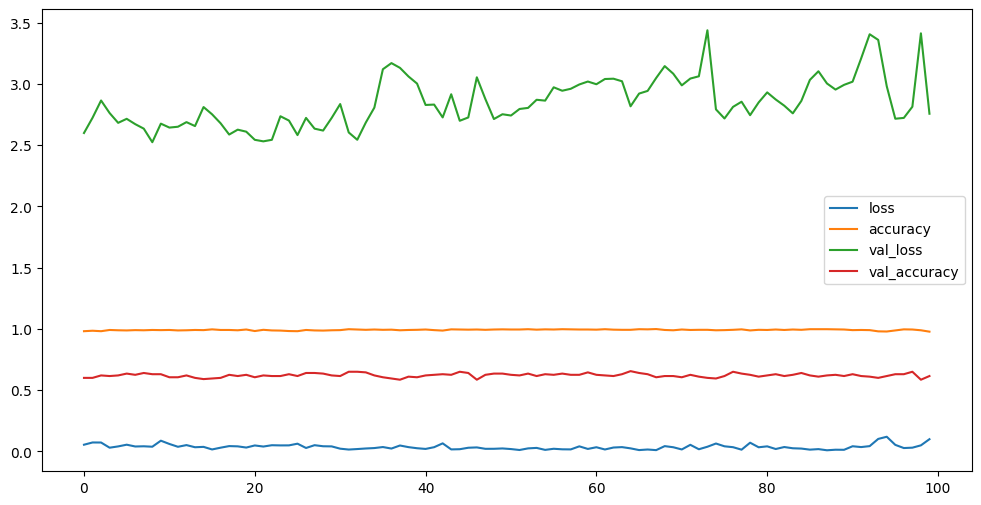

In [53]:
pd.DataFrame(history.history).plot(figsize=(12,6))
plt.show()

In [54]:
model.predict(X_test)

7/7 [==============================] - 0s 8ms/step


array([[1.2541906e-02, 3.2300712e-04, 7.4887602e-03, ..., 1.8806200e-05,
        1.0007554e-03, 9.3764257e-01],
       [6.1904905e-19, 6.8624972e-13, 2.6954358e-10, ..., 9.9999928e-01,
        6.7186590e-09, 8.5190095e-09],
       [9.9998212e-01, 4.2755461e-09, 4.4742160e-06, ..., 1.3241308e-13,
        1.0222671e-05, 1.9832110e-06],
       ...,
       [1.8438608e-05, 3.1366999e-06, 9.9767488e-01, ..., 2.9472556e-04,
        3.1194406e-05, 1.6036502e-04],
       [1.1334012e-06, 2.1449896e-08, 9.9996281e-01, ..., 2.2017177e-06,
        2.7021608e-06, 3.2511732e-06],
       [1.1640387e-04, 8.5822487e-01, 2.5486120e-04, ..., 1.8298279e-03,
        6.7892335e-03, 1.2514786e-03]], dtype=float32)

In [67]:
predictions = model.predict(X_test)  # Replace X_test with your test data
print(predictions)
predicted_labels = np.argmax(predictions, axis=1)  # Convert softmax output to class labels
print(predicted_labels)
true_labels = np.argmax(y_test, axis=1)  # Assuming y_test is one-hot encoded
print(true_labels)

precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)

7/7 [==============================] - 0s 7ms/step
[[9.8585725e-01 2.0785542e-04 4.7038221e-03 ... 9.1530671e-07
  4.9981015e-04 2.7256303e-03]
 [7.4602169e-17 3.5015411e-12 1.1039204e-09 ... 9.9999917e-01
  7.6000418e-07 8.3742464e-08]
 [9.9999702e-01 6.7602729e-11 2.7743206e-07 ... 1.4485139e-14
  3.6781339e-07 2.0699126e-06]
 ...
 [7.1313744e-04 6.0674306e-06 9.8861527e-01 ... 3.0275263e-04
  2.8833159e-05 5.9311988e-04]
 [7.1453888e-07 5.8163048e-09 9.9999428e-01 ... 5.2374935e-07
  2.0723917e-06 3.5205852e-07]
 [3.1314950e-05 9.9931943e-01 2.0942605e-06 ... 1.9425970e-05
  1.4363010e-04 2.6741970e-06]]
[0 7 0 3 6 7 5 2 8 2 6 4 1 1 5 7 6 5 5 0 8 8 8 0 1 7 5 5 9 6 7 4 0 4 6 6 9
 5 2 7 3 9 9 3 0 4 8 3 5 6 5 8 6 5 9 2 3 2 3 6 6 8 0 6 4 2 1 4 3 1 6 6 9 9
 4 5 5 4 6 0 8 6 8 3 2 5 8 8 4 2 4 0 9 4 6 7 7 5 0 0 5 4 4 4 1 4 7 8 1 6 0
 3 3 4 6 2 4 6 3 5 4 8 3 9 9 7 1 2 5 7 5 0 5 4 1 2 8 4 2 2 5 3 0 0 9 0 4 3
 4 3 6 8 3 2 8 0 4 4 4 8 9 5 6 4 7 1 7 2 7 5 4 6 1 7 7 1 9 7 2 7 4 3 6 0 7
 2 0 6 9 7

In [57]:
filename='audio/blues.00000.wav'
audio,sample_rate=librosa.load(filename,res_type='kaiser_fast')
mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
mfccs_scaled_features=np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
# print(predicted_label)
# predicted_label1 = predicted_label.flatten()
# pridiction_class=labelencoder.inverse_transform(predicted_label)
# print(pridiction_class)
predicted_label = np.squeeze(predicted_label)

# Define a default label for unseen values
default_label = "Unknown"

# Convert predicted_label to integer type
predicted_label_int = predicted_label.astype(int)

# Create a function to handle prediction classes
def handle_predictions(predictions, label_encoder, default_value):
    transformed_labels = []
    for pred in predictions:
        try:
            label = label_encoder.inverse_transform([pred])[0]
        except ValueError:
            label = default_value
        transformed_labels.append(label)
    return transformed_labels

# Use the function to transform predicted labels
prediction_classes = handle_predictions(predicted_label_int, labelencoder, default_label)
print(prediction_classes[0])

[-1.1359882e+02  1.2157067e+02 -1.9162262e+01  4.2363937e+01
 -6.3622661e+00  1.8621931e+01 -1.3699734e+01  1.5339802e+01
 -1.2274304e+01  1.0970945e+01 -8.3260612e+00  8.8020878e+00
 -3.6699414e+00  5.7446756e+00 -5.1627831e+00  7.5170642e-01
 -1.6878541e+00 -4.0872997e-01 -2.3026767e+00  1.2224671e+00
 -3.5328746e+00 -1.1397806e+00 -4.2828279e+00 -4.2260838e+00
  9.1518766e-01  9.1406393e-01 -5.7618074e+00 -3.9328036e+00
  1.5094346e+00  2.6984656e+00  5.6560731e+00 -3.2690079e+00
 -2.0606375e-01 -2.9996982e+00  4.4763169e+00 -4.7685504e-01
  6.0062852e+00 -5.9690334e-02 -3.4585848e+00 -1.8418324e+00]
[[-1.1359882e+02  1.2157067e+02 -1.9162262e+01  4.2363937e+01
  -6.3622661e+00  1.8621931e+01 -1.3699734e+01  1.5339802e+01
  -1.2274304e+01  1.0970945e+01 -8.3260612e+00  8.8020878e+00
  -3.6699414e+00  5.7446756e+00 -5.1627831e+00  7.5170642e-01
  -1.6878541e+00 -4.0872997e-01 -2.3026767e+00  1.2224671e+00
  -3.5328746e+00 -1.1397806e+00 -4.2828279e+00 -4.2260838e+00
   9.1518766e-01 